In [1]:
import pandas as pd
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
rides_dataA_raw = pd.read_csv("Rides_DataA.csv")
rides_dataB_raw = pd.read_csv("Rides_DataB.csv")
Weather_Data = pd.read_csv("Weather_Data.csv")

/var/folders/5s/jq_rsff123s3hz43c0w63gy40000gn/T/ipykernel_49604/1909450748.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  rides_dataB_raw = pd.read_csv("Rides_DataB.csv")


In [7]:
rides_dataA_raw.head()

,RIDE_ID,started_on,created_date,updated_date,completed_on,distance_travelled,end_location_lat,end_location_long,driver_rating,rider_rating,...,charity_id,requested_car_category,free_credit_used,surge_factor,start_location_long,start_location_lat,rider_id,round_up_amount,promocode_redemption_id,driver_reached_on
0,0,2016-06-04 00:18:49-05:00,2016-06-04 00:10:19-05:00,2016-06-04 00:27:48-05:00,2016-06-04 00:27:32-05:00,8459.00,38.68,-121.04,5.00,5.00,...,NaN,b'REGULAR',NaN,0.00,-121.07,38.66,0,NaN,NaN,2016-06-04 00:14:11-05:00
1,1,2016-06-04 01:50:12-05:00,2016-06-04 01:47:39-05:00,2016-06-04 01:52:00-05:00,2016-06-04 01:51:49-05:00,443.00,38.68,-121.04,5.00,5.00,...,NaN,b'REGULAR',NaN,0.00,-121.04,38.68,0,NaN,NaN,2016-06-04 01:50:02-05:00
2,2,2016-06-04 03:16:02-05:00,2016-06-04 03:13:07-05:00,2016-06-04 03:18:07-05:00,2016-06-04 03:17:57-05:00,568.00,38.68,-121.04,3.00,5.00,...,NaN,b'REGULAR',NaN,0.00,-121.04,38.68,0,NaN,NaN,2016-06-04 03:16:01-05:00
3,3,2016-06-04 10:05:13-05:00,2016-06-04 09:52:35-05:00,2016-06-04 10:14:00-05:00,2016-06-04 10:13:38-05:00,4051.00,30.27,-97.74,5.00,5.00,...,NaN,b'REGULAR',NaN,0.00,-97.76,30.25,1,NaN,NaN,2016-06-04 10:01:19-05:00
4,4,2016-06-04 10:24:25-05:00,2016-06-04 10:23:25-05:00,2016-06-04 10:26:16-05:00,2016-06-04 10:26:07-05:00,790.00,30.27,-97.75,5.00,5.00,...,NaN,b'REGULAR',NaN,0.00,-97.75,30.27,2,NaN,NaN,2016-06-04 10:24:15-05:00


In [8]:
rides_dataA_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494125 entries, 0 to 1494124
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   RIDE_ID                  1494125 non-null  int64  
 1   started_on               1494125 non-null  object 
 2   created_date             1494125 non-null  object 
 3   updated_date             1494125 non-null  object 
 4   completed_on             1494125 non-null  object 
 5   distance_travelled       1494123 non-null  float64
 6   end_location_lat         1494125 non-null  float64
 7   end_location_long        1494125 non-null  float64
 8   driver_rating            1355725 non-null  float64
 9   rider_rating             1468193 non-null  float64
 10  active_driver_id         1494125 non-null  int64  
 11  charity_id               369561 non-null   float64
 12  requested_car_category   1494125 non-null  object 
 13  free_credit_used         225394 non-null  

In [9]:
rides_dataB_raw.head()

,RIDE_ID,base_fare,total_fare,rate_per_mile,rate_per_minute,time_fare,driver_accepted_on,esimtated_time_arrive,tipped_on,tip,...,dispatched_on,status,driver_id,car_id,color,make,model,year,car_categories_bitmask,rating
0,0,1.50,25.84,1.50,0.25,2.18,NaN,NaN,NaN,NaN,...,2016-06-04 05:10:19,b'DISPATCHED',0,0,b'Gray',b'Bentley',b'Continental GT',b'2013',1,5.00
1,1,1.50,5.00,1.50,0.25,0.41,NaN,NaN,NaN,NaN,...,2016-06-04 06:47:39,b'DISPATCHED',0,0,b'Gray',b'Bentley',b'Continental GT',b'2013',1,5.00
2,2,1.50,5.00,1.50,0.25,0.48,NaN,NaN,NaN,NaN,...,2016-06-04 08:13:07,b'DISPATCHED',0,0,b'Gray',b'Bentley',b'Continental GT',b'2013',1,5.00
3,3,1.50,8.93,1.50,0.25,2.11,NaN,NaN,NaN,NaN,...,2016-06-04 14:52:35,b'DISPATCHED',1,1,b'Black',b'Cadillac',b'XTS',b'2013',21,5.00
4,4,1.50,5.00,1.50,0.25,0.43,NaN,NaN,NaN,NaN,...,2016-06-04 15:23:25,b'DISPATCHED',1,1,b'Black',b'Cadillac',b'XTS',b'2013',21,5.00


In [10]:
rides_dataB_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494125 entries, 0 to 1494124
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   RIDE_ID                    1494125 non-null  int64  
 1   base_fare                  1494125 non-null  float64
 2   total_fare                 1494123 non-null  float64
 3   rate_per_mile              1494125 non-null  float64
 4   rate_per_minute            1494125 non-null  float64
 5   time_fare                  1494123 non-null  float64
 6   driver_accepted_on         1494059 non-null  object 
 7   esimtated_time_arrive      1415588 non-null  object 
 8   tipped_on                  430895 non-null   object 
 9   tip                        430895 non-null   float64
 10  driving_time_to_rider      1472302 non-null  float64
 11  dispatch_location_lat      1494125 non-null  float64
 12  dispatch_location_long     1494125 non-null  float64
 13  driving_dist

In [11]:
Weather_Data.head()

,RIDE_ID,HOURLYVISIBILITY,HOURLYDRYBULBTEMPC,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYPrecip,DAILYMaximumDryBulbTemp,DAILYMinimumDryBulbTemp,DAILYDeptFromNormalAverageTemp,DAILYAverageRelativeHumidity,DAILYSunrise,DAILYSunset,DAILYPrecip,DAILYAverageWindSpeed,DAILYPeakWindSpeed
0,0,8.75,20.70,94.00,6.00,13.33,0.00,NaN,NaN,NaN,NaN,529.00,1930.00,1.63,NaN,NaN
1,1,6.00,21.10,93.00,1.50,0.00,0.00,NaN,NaN,NaN,NaN,529.00,1930.00,NaN,NaN,NaN
2,2,10.00,23.03,88.00,5.00,350.00,NaN,NaN,NaN,NaN,NaN,529.00,1930.00,NaN,NaN,NaN
3,3,10.00,26.70,64.00,11.00,360.00,0.00,NaN,NaN,NaN,NaN,529.00,1930.00,NaN,NaN,NaN
4,4,10.00,26.70,64.00,11.00,360.00,0.00,NaN,NaN,NaN,NaN,529.00,1930.00,NaN,NaN,NaN


In [12]:
Weather_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494125 entries, 0 to 1494124
Data columns (total 16 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   RIDE_ID                         1494125 non-null  int64  
 1   HOURLYVISIBILITY                1484509 non-null  float64
 2   HOURLYDRYBULBTEMPC              1491343 non-null  float64
 3   HOURLYRelativeHumidity          1475667 non-null  float64
 4   HOURLYWindSpeed                 1481350 non-null  float64
 5   HOURLYWindDirection             1140880 non-null  float64
 6   HOURLYPrecip                    1420991 non-null  float64
 7   DAILYMaximumDryBulbTemp         83123 non-null    float64
 8   DAILYMinimumDryBulbTemp         83123 non-null    float64
 9   DAILYDeptFromNormalAverageTemp  83123 non-null    float64
 10  DAILYAverageRelativeHumidity    36318 non-null    float64
 11  DAILYSunrise                    1493167 non-null  float64
 12  

### clean rideA & rideB

In [7]:
rides_dataA = clean_byte_string_columns(rides_dataA_raw)
rides_dataB = clean_byte_string_columns(rides_dataB_raw)

In [14]:
rides_dataA.head()

,RIDE_ID,started_on,created_date,updated_date,completed_on,distance_travelled,end_location_lat,end_location_long,driver_rating,rider_rating,...,charity_id,requested_car_category,free_credit_used,surge_factor,start_location_long,start_location_lat,rider_id,round_up_amount,promocode_redemption_id,driver_reached_on
0,0,2016-06-04 00:18:49-05:00,2016-06-04 00:10:19-05:00,2016-06-04 00:27:48-05:00,2016-06-04 00:27:32-05:00,8459.00,38.68,-121.04,5.00,5.00,...,NaN,REGULAR,NaN,0.00,-121.07,38.66,0,NaN,NaN,2016-06-04 00:14:11-05:00
1,1,2016-06-04 01:50:12-05:00,2016-06-04 01:47:39-05:00,2016-06-04 01:52:00-05:00,2016-06-04 01:51:49-05:00,443.00,38.68,-121.04,5.00,5.00,...,NaN,REGULAR,NaN,0.00,-121.04,38.68,0,NaN,NaN,2016-06-04 01:50:02-05:00
2,2,2016-06-04 03:16:02-05:00,2016-06-04 03:13:07-05:00,2016-06-04 03:18:07-05:00,2016-06-04 03:17:57-05:00,568.00,38.68,-121.04,3.00,5.00,...,NaN,REGULAR,NaN,0.00,-121.04,38.68,0,NaN,NaN,2016-06-04 03:16:01-05:00
3,3,2016-06-04 10:05:13-05:00,2016-06-04 09:52:35-05:00,2016-06-04 10:14:00-05:00,2016-06-04 10:13:38-05:00,4051.00,30.27,-97.74,5.00,5.00,...,NaN,REGULAR,NaN,0.00,-97.76,30.25,1,NaN,NaN,2016-06-04 10:01:19-05:00
4,4,2016-06-04 10:24:25-05:00,2016-06-04 10:23:25-05:00,2016-06-04 10:26:16-05:00,2016-06-04 10:26:07-05:00,790.00,30.27,-97.75,5.00,5.00,...,NaN,REGULAR,NaN,0.00,-97.75,30.27,2,NaN,NaN,2016-06-04 10:24:15-05:00


In [15]:
rides_dataB.head()

,RIDE_ID,base_fare,total_fare,rate_per_mile,rate_per_minute,time_fare,driver_accepted_on,esimtated_time_arrive,tipped_on,tip,...,dispatched_on,status,driver_id,car_id,color,make,model,year,car_categories_bitmask,rating
0,0,1.50,25.84,1.50,0.25,2.18,NaN,NaN,NaN,NaN,...,2016-06-04 05:10:19,DISPATCHED,0,0,Gray,Bentley,Continental GT,2013,1,5.00
1,1,1.50,5.00,1.50,0.25,0.41,NaN,NaN,NaN,NaN,...,2016-06-04 06:47:39,DISPATCHED,0,0,Gray,Bentley,Continental GT,2013,1,5.00
2,2,1.50,5.00,1.50,0.25,0.48,NaN,NaN,NaN,NaN,...,2016-06-04 08:13:07,DISPATCHED,0,0,Gray,Bentley,Continental GT,2013,1,5.00
3,3,1.50,8.93,1.50,0.25,2.11,NaN,NaN,NaN,NaN,...,2016-06-04 14:52:35,DISPATCHED,1,1,Black,Cadillac,XTS,2013,21,5.00
4,4,1.50,5.00,1.50,0.25,0.43,NaN,NaN,NaN,NaN,...,2016-06-04 15:23:25,DISPATCHED,1,1,Black,Cadillac,XTS,2013,21,5.00


### join full df

In [16]:
rides_dataB_filtered = rides_dataB.query(" status != 'DECLINED' ")
rides_data = pd.merge(rides_dataA, rides_dataB_filtered, how='inner', on='RIDE_ID', suffixes=('_A', '_B'))

In [17]:
rides_data.head()

,RIDE_ID,started_on,created_date,updated_date,completed_on,distance_travelled,end_location_lat,end_location_long,driver_rating,rider_rating,...,dispatched_on,status,driver_id,car_id,color,make,model,year,car_categories_bitmask,rating
0,0,2016-06-04 00:18:49-05:00,2016-06-04 00:10:19-05:00,2016-06-04 00:27:48-05:00,2016-06-04 00:27:32-05:00,8459.00,38.68,-121.04,5.00,5.00,...,2016-06-04 05:10:19,DISPATCHED,0,0,Gray,Bentley,Continental GT,2013,1,5.00
1,1,2016-06-04 01:50:12-05:00,2016-06-04 01:47:39-05:00,2016-06-04 01:52:00-05:00,2016-06-04 01:51:49-05:00,443.00,38.68,-121.04,5.00,5.00,...,2016-06-04 06:47:39,DISPATCHED,0,0,Gray,Bentley,Continental GT,2013,1,5.00
2,2,2016-06-04 03:16:02-05:00,2016-06-04 03:13:07-05:00,2016-06-04 03:18:07-05:00,2016-06-04 03:17:57-05:00,568.00,38.68,-121.04,3.00,5.00,...,2016-06-04 08:13:07,DISPATCHED,0,0,Gray,Bentley,Continental GT,2013,1,5.00
3,3,2016-06-04 10:05:13-05:00,2016-06-04 09:52:35-05:00,2016-06-04 10:14:00-05:00,2016-06-04 10:13:38-05:00,4051.00,30.27,-97.74,5.00,5.00,...,2016-06-04 14:52:35,DISPATCHED,1,1,Black,Cadillac,XTS,2013,21,5.00
4,4,2016-06-04 10:24:25-05:00,2016-06-04 10:23:25-05:00,2016-06-04 10:26:16-05:00,2016-06-04 10:26:07-05:00,790.00,30.27,-97.75,5.00,5.00,...,2016-06-04 15:23:25,DISPATCHED,1,1,Black,Cadillac,XTS,2013,21,5.00


In [18]:
# Convert to datetime with error handling
rides_data['created_date'] = pd.to_datetime(rides_data['created_date'], errors='coerce')
rides_data['driver_reached_on'] = pd.to_datetime(rides_data['driver_reached_on'], errors='coerce')

# Calculate wait time
rides_data['customer_wait_time'] = rides_data['driver_reached_on'] - rides_data['created_date']

# Remove rows with invalid data
rides_data = rides_data.dropna(subset=['customer_wait_time'])

# Check if we have a proper timedelta column
print(f"Data type of customer_wait_time: {rides_data['customer_wait_time'].dtype}")

# Only proceed if it's actually a timedelta
if pd.api.types.is_timedelta64_dtype(rides_data['customer_wait_time']):
    rides_data['customer_wait_time_seconds'] = rides_data['customer_wait_time'].dt.total_seconds().astype(int)
else:
    print("customer_wait_time is not a timedelta. Converting manually...")
    # Force convert to timedelta if possible
    rides_data['customer_wait_time'] = pd.to_timedelta(rides_data['customer_wait_time'], errors='coerce')
    rides_data = rides_data.dropna(subset=['customer_wait_time'])
    rides_data['customer_wait_time_seconds'] = rides_data['customer_wait_time'].dt.total_seconds().astype(int)

/var/folders/5s/jq_rsff123s3hz43c0w63gy40000gn/T/ipykernel_13757/3516949908.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  rides_data['created_date'] = pd.to_datetime(rides_data['created_date'], errors='coerce')
/var/folders/5s/jq_rsff123s3hz43c0w63gy40000gn/T/ipykernel_13757/3516949908.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  rides_data['driver_reached_on'] = pd.to_datetime(rides_data['driver_reached_on'], errors='coerce')


Data type of customer_wait_time: object
customer_wait_time is not a timedelta. Converting manually...


In [19]:
# Add distance column
rides_data = add_travel_distance_miles(
    rides_data, 
    lat1_col='start_location_lat', 
    long1_col='start_location_long',
    lat2_col='end_location_lat', 
    long2_col='end_location_long'
)

In [20]:
rides_data[['start_location_lat', 'start_location_long', 'end_location_lat', 'end_location_long', 'travel_distance_miles']].tail()

,start_location_lat,start_location_long,end_location_lat,end_location_long,travel_distance_miles
1045439,30.30,-97.72,30.29,-97.74,1.26
1045440,30.20,-97.77,30.22,-97.84,4.88
1045441,30.25,-97.75,30.26,-97.76,1.26
1045442,30.38,-97.85,30.27,-97.74,10.08
1045443,30.28,-97.74,30.27,-97.74,0.52


In [21]:
rides_data.tail()

,RIDE_ID,started_on,created_date,updated_date,completed_on,distance_travelled,end_location_lat,end_location_long,driver_rating,rider_rating,...,car_id,color,make,model,year,car_categories_bitmask,rating,customer_wait_time,customer_wait_time_seconds,travel_distance_miles
1045439,1494119,2017-04-13 18:59:07-05:00,2017-04-13 18:53:58-05:00,2017-04-13 23:54:18-05:00,2017-04-13 19:08:54-05:00,3532.00,30.29,-97.74,5.00,5.00,...,808,Black,Hyundai,Sonata,2015,1,4.87,0 days 00:05:01,301,1.26
1045440,1494120,2017-04-13 18:59:13-05:00,2017-04-13 18:55:36-05:00,2017-04-13 19:16:26-05:00,2017-04-13 19:15:52-05:00,9374.00,30.22,-97.84,5.00,5.00,...,4620,Black,Toyota,Yaris,2007,1,4.62,0 days 00:03:04,184,4.88
1045441,1494121,2017-04-13 18:59:16-05:00,2017-04-13 18:56:41-05:00,2017-04-14 19:07:18-05:00,2017-04-13 19:07:14-05:00,2954.00,30.26,-97.76,NaN,5.00,...,248,Red,Toyota,Camry,2008,1,4.95,0 days 00:01:51,111,1.26
1045442,1494123,2017-04-13 18:59:31-05:00,2017-04-13 18:41:53-05:00,2017-04-14 06:01:58-05:00,2017-04-13 19:24:20-05:00,25021.00,30.27,-97.74,5.00,5.00,...,4064,White,Chevrolet,Impala,2012,1,4.63,0 days 00:09:52,592,10.08
1045443,1494124,2017-04-13 18:59:43-05:00,2017-04-13 18:55:28-05:00,2017-04-15 12:07:06-05:00,2017-04-13 19:02:31-05:00,1129.00,30.27,-97.74,5.00,5.00,...,522,White,Nissan,Sentra,2014,1,4.86,0 days 00:04:10,250,0.52


In [22]:
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044610 entries, 0 to 1045443
Data columns (total 47 columns):
 #   Column                      Non-Null Count    Dtype          
---  ------                      --------------    -----          
 0   RIDE_ID                     1044610 non-null  int64          
 1   started_on                  1044610 non-null  object         
 2   created_date                1044610 non-null  object         
 3   updated_date                1044610 non-null  object         
 4   completed_on                1044610 non-null  object         
 5   distance_travelled          1044610 non-null  float64        
 6   end_location_lat            1044610 non-null  float64        
 7   end_location_long           1044610 non-null  float64        
 8   driver_rating               948716 non-null   float64        
 9   rider_rating                1027147 non-null  float64        
 10  active_driver_id            1044610 non-null  int64          
 11  charity_id      

In [23]:
##NOTE: ADD FIRST RIDE FOR DRIVER & RIDER IF RATING IS NULL
##NOTE: FILLNA W/ 0 FOR RATING IS NULL

### plots

In [24]:
cols_to_keep = ['rider_rating', 'requested_car_category', 'surge_factor', 'rider_id', 'base_fare', 'rate_per_mile', 'rate_per_minute', 'travel_distance_miles', 'customer_wait_time_seconds']

In [25]:
rides_data_condense = rides_data[cols_to_keep]
rides_data_condense.head()

,rider_rating,requested_car_category,surge_factor,rider_id,base_fare,rate_per_mile,rate_per_minute,travel_distance_miles,customer_wait_time_seconds
0,5.00,REGULAR,0.00,0,1.50,1.50,0.25,2.26,232
1,5.00,REGULAR,0.00,0,1.50,1.50,0.25,0.21,143
2,5.00,REGULAR,0.00,0,1.50,1.50,0.25,0.21,174
3,5.00,REGULAR,0.00,1,1.50,1.50,0.25,2.12,524
4,5.00,REGULAR,0.00,2,1.50,1.50,0.25,0.12,50


In [26]:
rides_data_condense.describe()

,rider_rating,surge_factor,rider_id,base_fare,rate_per_mile,rate_per_minute,travel_distance_miles,customer_wait_time_seconds
count,1027147.00,1044610.00,1044610.00,1044610.00,1044610.00,1044610.00,1044610.00,1044610.00
mean,4.89,1.10,95274.64,1.58,1.10,0.26,3.66,-2541.33
std,0.54,0.40,72363.46,0.38,0.39,0.03,19.98,2038410.80
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1473173616.00
25%,5.00,1.00,31209.00,1.50,0.99,0.25,1.29,136.00
50%,5.00,1.00,83480.00,1.50,0.99,0.25,2.42,232.00
75%,5.00,1.00,149281.00,1.50,0.99,0.25,4.96,365.00
max,5.00,6.00,260958.00,5.00,3.75,0.50,6681.76,56704.00


In [27]:
rides_data_condense = rides_data_condense[rides_data_condense['customer_wait_time_seconds'] > 0]

In [28]:
rides_data_condense.describe()

,rider_rating,surge_factor,rider_id,base_fare,rate_per_mile,rate_per_minute,travel_distance_miles,customer_wait_time_seconds
count,1027144.00,1044607.00,1044607.00,1044607.00,1044607.00,1044607.00,1044607.00,1044607.00
mean,4.89,1.10,95274.87,1.58,1.10,0.26,3.66,279.20
std,0.54,0.40,72363.44,0.38,0.39,0.03,19.98,225.02
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,5.00,1.00,31209.00,1.50,0.99,0.25,1.29,136.00
50%,5.00,1.00,83480.00,1.50,0.99,0.25,2.42,232.00
75%,5.00,1.00,149281.00,1.50,0.99,0.25,4.96,365.00
max,5.00,6.00,260958.00,5.00,3.75,0.50,6681.76,56704.00


In [29]:
rides_data_condense.sort_values(by=['travel_distance_miles'], ascending=False).head(15)

,rider_rating,requested_car_category,surge_factor,rider_id,base_fare,rate_per_mile,rate_per_minute,travel_distance_miles,customer_wait_time_seconds
608378,5.00,SUV,1.25,150956,3.00,2.60,0.35,6681.76,315
662805,5.00,REGULAR,1.00,34104,1.50,0.99,0.25,6680.70,348
560723,5.00,REGULAR,1.00,163325,1.50,0.99,0.25,6680.53,124
736470,5.00,REGULAR,1.00,198114,1.50,0.99,0.25,6680.23,194
706552,5.00,REGULAR,1.00,190999,1.50,0.99,0.25,6678.90,6
738729,5.00,REGULAR,1.00,121918,1.50,0.99,0.25,6676.35,211
661176,5.00,REGULAR,1.00,182367,1.50,0.99,0.25,6676.35,186
702901,5.00,SUV,1.00,190380,3.00,2.60,0.35,6676.30,159
699403,5.00,REGULAR,1.00,189719,1.50,0.99,0.25,6676.29,43
63791,5.00,REGULAR,1.00,99,1.50,1.50,0.25,1220.10,18


In [30]:
# AUSTIN --> HOUSTON = 165mi
# AUSTIN --> DALLAS = 195mi
# AUSTIN --> SAN ANTONIO = 80mi
rides_data_condense = rides_data_condense[(rides_data_condense['travel_distance_miles'] < 200) & (rides_data_condense['travel_distance_miles'] > 0)]

In [31]:
rides_data_condense.describe()

,rider_rating,surge_factor,rider_id,base_fare,rate_per_mile,rate_per_minute,travel_distance_miles,customer_wait_time_seconds
count,1019488.00,1036467.00,1036467.00,1036467.00,1036467.00,1036467.00,1036467.00,1036467.00
mean,4.89,1.10,95343.32,1.58,1.10,0.26,3.63,279.18
std,0.53,0.40,72369.32,0.37,0.39,0.03,3.58,224.82
min,0.00,0.00,0.00,0.00,0.00,0.00,0.06,1.00
25%,5.00,1.00,31312.00,1.50,0.99,0.25,1.31,137.00
50%,5.00,1.00,83583.00,1.50,0.99,0.25,2.44,232.00
75%,5.00,1.00,149350.00,1.50,0.99,0.25,5.00,365.00
max,5.00,6.00,260958.00,5.00,3.75,0.50,189.59,56704.00


In [32]:
rides_data_condense.sort_values(by=['customer_wait_time_seconds'], ascending=False).head(15)

,rider_rating,requested_car_category,surge_factor,rider_id,base_fare,rate_per_mile,rate_per_minute,travel_distance_miles,customer_wait_time_seconds
115089,5.00,REGULAR,1.50,51378,1.50,0.99,0.25,3.68,56704
231269,5.00,REGULAR,2.50,89792,1.50,0.99,0.25,15.64,27436
40186,5.00,REGULAR,1.00,10561,1.50,1.50,0.25,6.42,20688
258240,5.00,REGULAR,1.00,4477,1.50,0.99,0.25,8.14,15156
135526,5.00,REGULAR,1.00,21750,1.50,0.99,0.25,10.61,13593
431052,2.00,REGULAR,1.00,136675,1.50,0.99,0.25,1.82,10096
464809,5.00,REGULAR,1.00,117413,1.50,0.99,0.25,1.13,9006
59550,5.00,REGULAR,1.00,31324,1.50,1.50,0.25,3.05,7612
59515,5.00,REGULAR,1.00,31305,1.50,1.50,0.25,10.56,7178
604879,NaN,REGULAR,1.25,19099,1.50,0.99,0.25,0.12,7012


In [33]:
## filter to wait time <1hr --> assuming major issue such as bug in app or data discrepancy for >1hr wait time
rides_data_condense = rides_data_condense[rides_data_condense['customer_wait_time_seconds'] < 3600]

In [34]:
rides_data_condense.describe()

,rider_rating,surge_factor,rider_id,base_fare,rate_per_mile,rate_per_minute,travel_distance_miles,customer_wait_time_seconds
count,1019444.00,1036418.00,1036418.00,1036418.00,1036418.00,1036418.00,1036418.00,1036418.00
mean,4.89,1.10,95344.18,1.58,1.10,0.26,3.63,278.85
std,0.53,0.40,72369.02,0.37,0.39,0.03,3.58,211.98
min,0.00,0.00,0.00,0.00,0.00,0.00,0.06,1.00
25%,5.00,1.00,31314.00,1.50,0.99,0.25,1.31,137.00
50%,5.00,1.00,83583.00,1.50,0.99,0.25,2.44,232.00
75%,5.00,1.00,149352.00,1.50,0.99,0.25,5.00,365.00
max,5.00,6.00,260958.00,5.00,3.75,0.50,189.59,3586.00


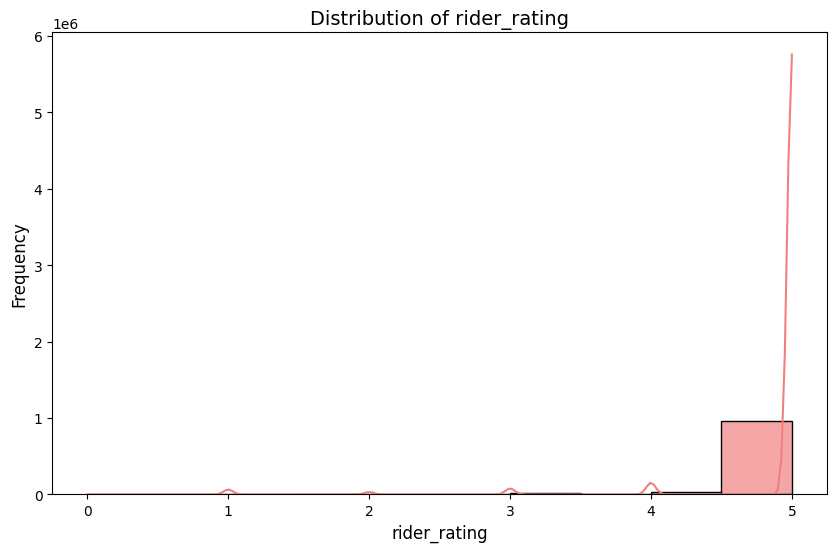

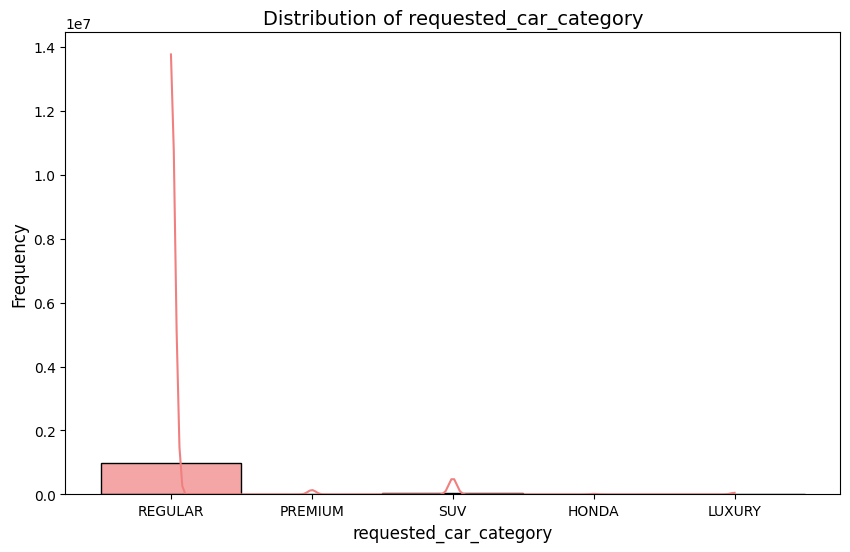

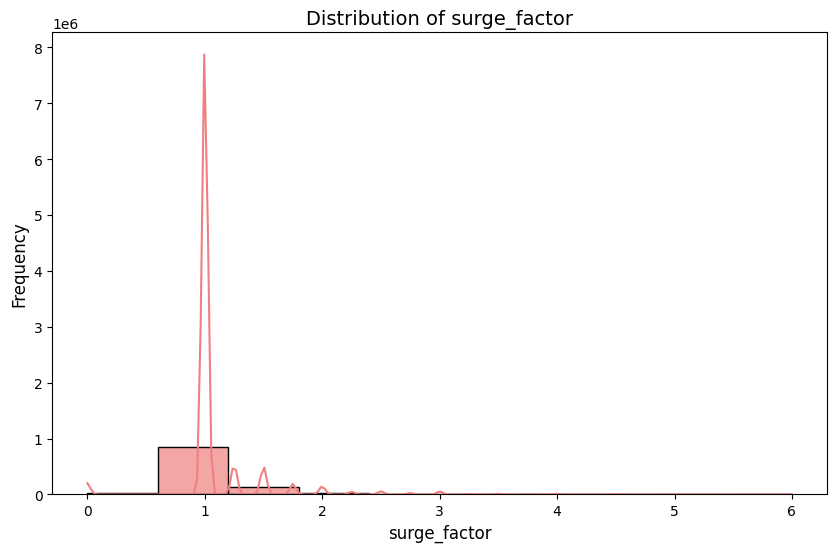

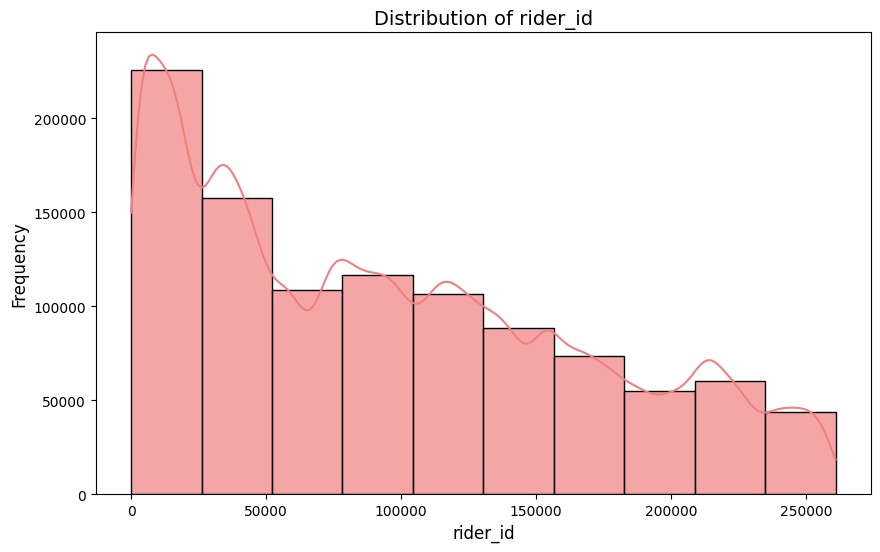

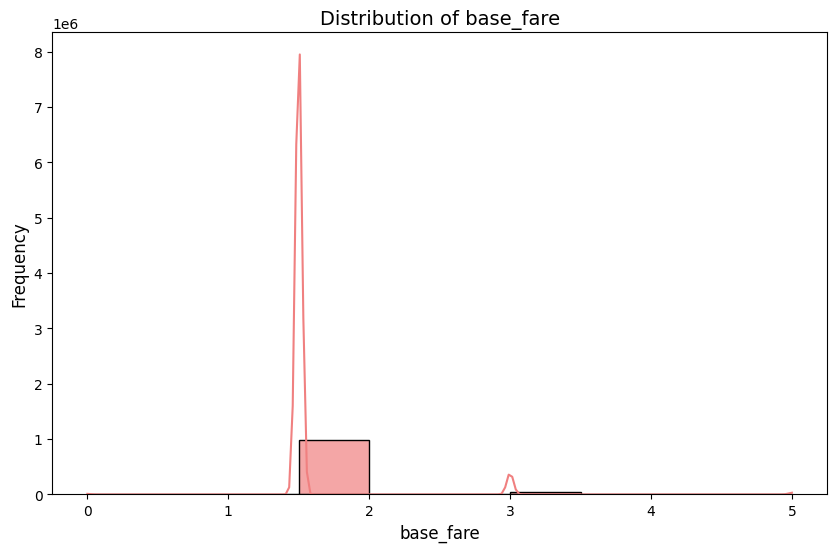

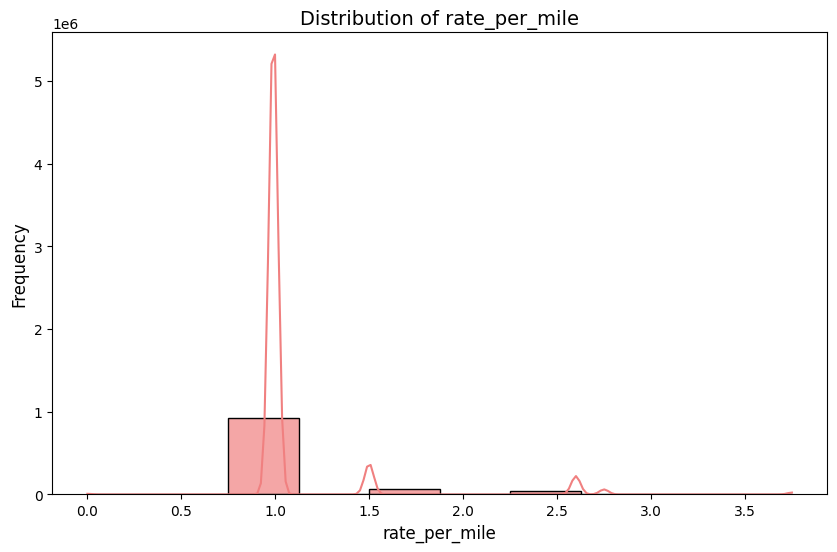

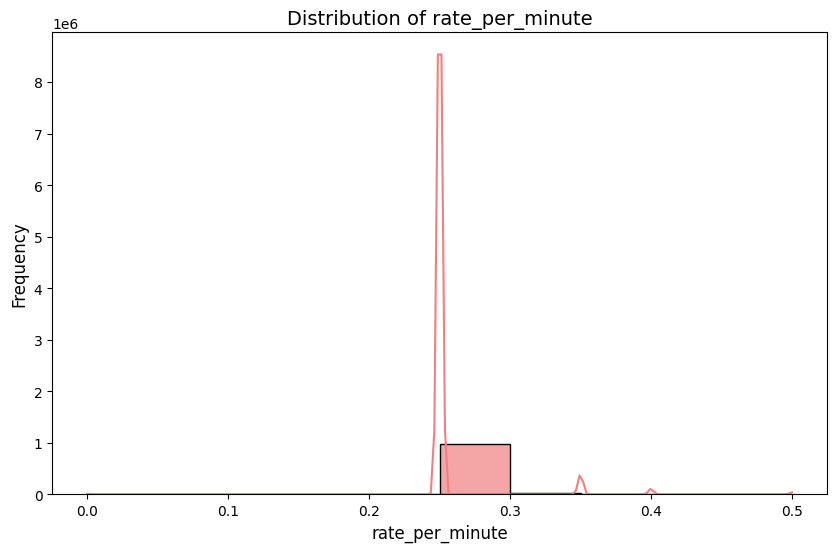

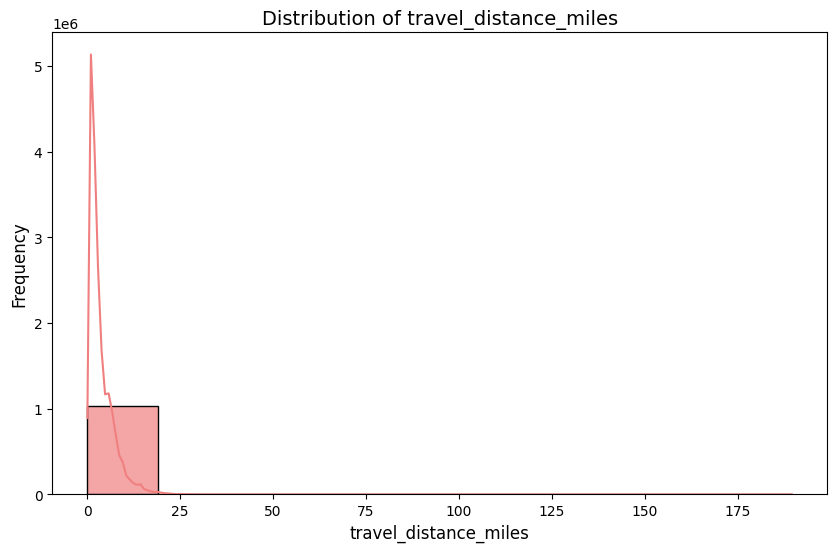

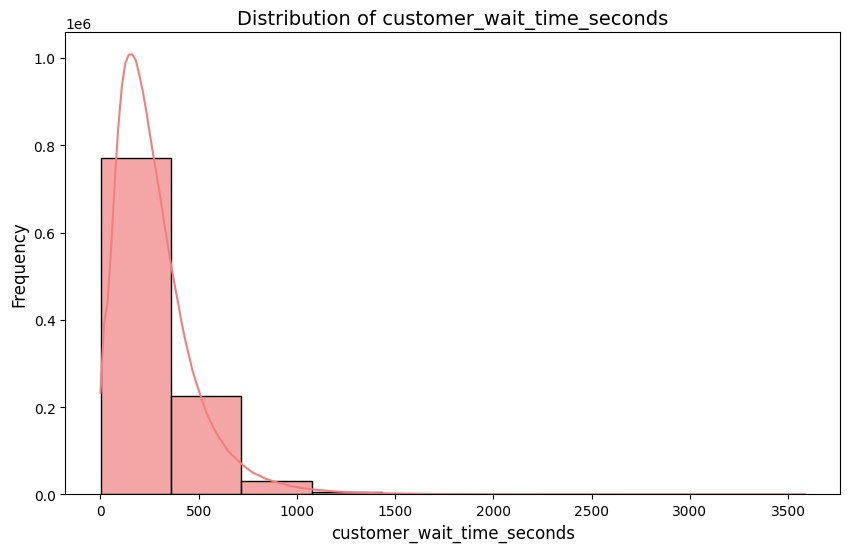

In [35]:
for col in range(len(cols_to_keep)):
    plot_histogram_kde(rides_data_condense, cols_to_keep[col], 
                        title=f"Distribution of {cols_to_keep[col]}", 
                        xlabel=f"{cols_to_keep[col]}",
                        bins=10, 
                        color="lightcoral")

### write train/test data

In [38]:
rides_data_condense.head()

,rider_rating,requested_car_category,surge_factor,rider_id,base_fare,rate_per_mile,rate_per_minute,travel_distance_miles,customer_wait_time_seconds
0,5.00,REGULAR,0.00,0,1.50,1.50,0.25,2.26,232
1,5.00,REGULAR,0.00,0,1.50,1.50,0.25,0.21,143
2,5.00,REGULAR,0.00,0,1.50,1.50,0.25,0.21,174
3,5.00,REGULAR,0.00,1,1.50,1.50,0.25,2.12,524
4,5.00,REGULAR,0.00,2,1.50,1.50,0.25,0.12,50


In [ ]:
# rides_data_condense.to_csv("rides_data_condense.csv", index=False)

### weather data

In [4]:
Weather_Data.head()

,RIDE_ID,HOURLYVISIBILITY,HOURLYDRYBULBTEMPC,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYPrecip,DAILYMaximumDryBulbTemp,DAILYMinimumDryBulbTemp,DAILYDeptFromNormalAverageTemp,DAILYAverageRelativeHumidity,DAILYSunrise,DAILYSunset,DAILYPrecip,DAILYAverageWindSpeed,DAILYPeakWindSpeed
0,0,8.75,20.70,94.00,6.00,13.33,0.00,NaN,NaN,NaN,NaN,529.00,1930.00,1.63,NaN,NaN
1,1,6.00,21.10,93.00,1.50,0.00,0.00,NaN,NaN,NaN,NaN,529.00,1930.00,NaN,NaN,NaN
2,2,10.00,23.03,88.00,5.00,350.00,NaN,NaN,NaN,NaN,NaN,529.00,1930.00,NaN,NaN,NaN
3,3,10.00,26.70,64.00,11.00,360.00,0.00,NaN,NaN,NaN,NaN,529.00,1930.00,NaN,NaN,NaN
4,4,10.00,26.70,64.00,11.00,360.00,0.00,NaN,NaN,NaN,NaN,529.00,1930.00,NaN,NaN,NaN


In [5]:
Weather_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494125 entries, 0 to 1494124
Data columns (total 16 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   RIDE_ID                         1494125 non-null  int64  
 1   HOURLYVISIBILITY                1484509 non-null  float64
 2   HOURLYDRYBULBTEMPC              1491343 non-null  float64
 3   HOURLYRelativeHumidity          1475667 non-null  float64
 4   HOURLYWindSpeed                 1481350 non-null  float64
 5   HOURLYWindDirection             1140880 non-null  float64
 6   HOURLYPrecip                    1420991 non-null  float64
 7   DAILYMaximumDryBulbTemp         83123 non-null    float64
 8   DAILYMinimumDryBulbTemp         83123 non-null    float64
 9   DAILYDeptFromNormalAverageTemp  83123 non-null    float64
 10  DAILYAverageRelativeHumidity    36318 non-null    float64
 11  DAILYSunrise                    1493167 non-null  float64
 12  

Daily stats may not be a large factor for waiting time. For example, if the max temp was early in the day, does that have an impact on a requested ride late at night? In other words, daily stats may be backwards looking. Perhaps, a forward looking stat such as max temp forecast would be a stronger feature of waiting time.

In [45]:
daily_cols = ['DAILYMaximumDryBulbTemp', 'DAILYMinimumDryBulbTemp', 'DAILYDeptFromNormalAverageTemp', 'DAILYAverageRelativeHumidity', \
              'DAILYPrecip', 'DAILYAverageWindSpeed', 'DAILYPeakWindSpeed']
Weather_Data_no_daily = Weather_Data.drop(columns=daily_cols)

Need to join rideA in order to get date of ride using Ride ID; using created_date bc want weather data at time of requesting ride

In [59]:
weather_rides_data = pd.merge(rides_dataA[['RIDE_ID', 'created_date']], Weather_Data_no_daily, how='inner', on='RIDE_ID', suffixes=('_A', '_weather'))

In [60]:
weather_rides_data.head()

,RIDE_ID,created_date,HOURLYVISIBILITY,HOURLYDRYBULBTEMPC,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYPrecip,DAILYSunrise,DAILYSunset
0,0,2016-06-04 00:10:19-05:00,8.75,20.70,94.00,6.00,13.33,0.00,529.00,1930.00
1,1,2016-06-04 01:47:39-05:00,6.00,21.10,93.00,1.50,0.00,0.00,529.00,1930.00
2,2,2016-06-04 03:13:07-05:00,10.00,23.03,88.00,5.00,350.00,NaN,529.00,1930.00
3,3,2016-06-04 09:52:35-05:00,10.00,26.70,64.00,11.00,360.00,0.00,529.00,1930.00
4,4,2016-06-04 10:23:25-05:00,10.00,26.70,64.00,11.00,360.00,0.00,529.00,1930.00


In [61]:
weather_rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494125 entries, 0 to 1494124
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   RIDE_ID                 1494125 non-null  int64  
 1   created_date            1494125 non-null  object 
 2   HOURLYVISIBILITY        1484509 non-null  float64
 3   HOURLYDRYBULBTEMPC      1491343 non-null  float64
 4   HOURLYRelativeHumidity  1475667 non-null  float64
 5   HOURLYWindSpeed         1481350 non-null  float64
 6   HOURLYWindDirection     1140880 non-null  float64
 7   HOURLYPrecip            1420991 non-null  float64
 8   DAILYSunrise            1493167 non-null  float64
 9   DAILYSunset             1493167 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 114.0+ MB


In [ ]:
print(weather_rides_data.iloc[373644]['created_date'])
# DST time creating issues for pd.to_datetime()

2016-11-06 01:00:09-06:00


In [68]:
# Convert string to datetime first, then extract components
weather_rides_data['created_date'] = pd.to_datetime(
    weather_rides_data['created_date'], 
    utc=True
)

In [69]:
weather_rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494125 entries, 0 to 1494124
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   RIDE_ID                 1494125 non-null  int64              
 1   created_date            1494125 non-null  datetime64[ns, UTC]
 2   HOURLYVISIBILITY        1484509 non-null  float64            
 3   HOURLYDRYBULBTEMPC      1491343 non-null  float64            
 4   HOURLYRelativeHumidity  1475667 non-null  float64            
 5   HOURLYWindSpeed         1481350 non-null  float64            
 6   HOURLYWindDirection     1140880 non-null  float64            
 7   HOURLYPrecip            1420991 non-null  float64            
 8   DAILYSunrise            1493167 non-null  float64            
 9   DAILYSunset             1493167 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(8), int64(1)
memory usage: 114.0 MB


In [70]:
# Extract date components
weather_rides_data['year'] = weather_rides_data['created_date'].dt.year.astype('Int64')
weather_rides_data['month'] = weather_rides_data['created_date'].dt.month.astype('Int64')
weather_rides_data['day'] = weather_rides_data['created_date'].dt.day.astype('Int64')
weather_rides_data['hour'] = weather_rides_data['created_date'].dt.hour.astype('Int64')
weather_rides_data['minute'] = weather_rides_data['created_date'].dt.minute.astype('Int64')
weather_rides_data['ride_date'] = weather_rides_data['created_date'].dt.date

In [55]:
weather_rides_data.head()

,RIDE_ID,created_date,HOURLYVISIBILITY,HOURLYDRYBULBTEMPC,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYPrecip,DAILYSunrise,DAILYSunset,year,month,day,hour,minute,ride_date
0,0,2016-06-04 00:10:19-05:00,8.75,20.70,94.00,6.00,13.33,0.00,529.00,1930.00,2016,6,4,0,10,2016-06-04
1,1,2016-06-04 01:47:39-05:00,6.00,21.10,93.00,1.50,0.00,0.00,529.00,1930.00,2016,6,4,1,47,2016-06-04
2,2,2016-06-04 03:13:07-05:00,10.00,23.03,88.00,5.00,350.00,NaN,529.00,1930.00,2016,6,4,3,13,2016-06-04
3,3,2016-06-04 09:52:35-05:00,10.00,26.70,64.00,11.00,360.00,0.00,529.00,1930.00,2016,6,4,9,52,2016-06-04
4,4,2016-06-04 10:23:25-05:00,10.00,26.70,64.00,11.00,360.00,0.00,529.00,1930.00,2016,6,4,10,23,2016-06-04


In [71]:
weather_rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494125 entries, 0 to 1494124
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   RIDE_ID                 1494125 non-null  int64              
 1   created_date            1494125 non-null  datetime64[ns, UTC]
 2   HOURLYVISIBILITY        1484509 non-null  float64            
 3   HOURLYDRYBULBTEMPC      1491343 non-null  float64            
 4   HOURLYRelativeHumidity  1475667 non-null  float64            
 5   HOURLYWindSpeed         1481350 non-null  float64            
 6   HOURLYWindDirection     1140880 non-null  float64            
 7   HOURLYPrecip            1420991 non-null  float64            
 8   DAILYSunrise            1493167 non-null  float64            
 9   DAILYSunset             1493167 non-null  float64            
 10  year                    1494125 non-null  Int64              
 11  month      

In [72]:
fillna_col_list = ['HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPC', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed', 'HOURLYWindDirection', 'HOURLYPrecip']
for fillna_col in fillna_col_list:
    weather_rides_data[f'{fillna_col}'] = weather_rides_data[f'{fillna_col}'].interpolate(method='linear')

In [73]:
weather_rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494125 entries, 0 to 1494124
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   RIDE_ID                 1494125 non-null  int64              
 1   created_date            1494125 non-null  datetime64[ns, UTC]
 2   HOURLYVISIBILITY        1494125 non-null  float64            
 3   HOURLYDRYBULBTEMPC      1494125 non-null  float64            
 4   HOURLYRelativeHumidity  1494125 non-null  float64            
 5   HOURLYWindSpeed         1494125 non-null  float64            
 6   HOURLYWindDirection     1494125 non-null  float64            
 7   HOURLYPrecip            1494125 non-null  float64            
 8   DAILYSunrise            1493167 non-null  float64            
 9   DAILYSunset             1493167 non-null  float64            
 10  year                    1494125 non-null  Int64              
 11  month      

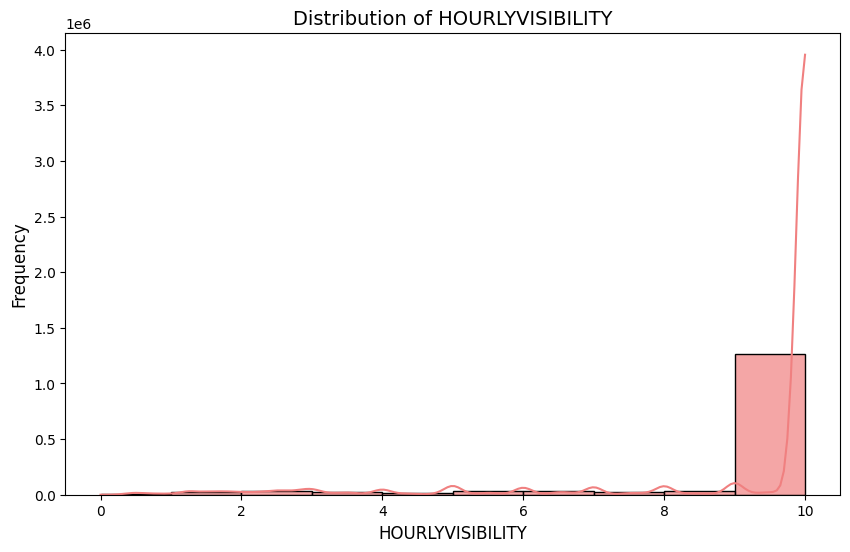

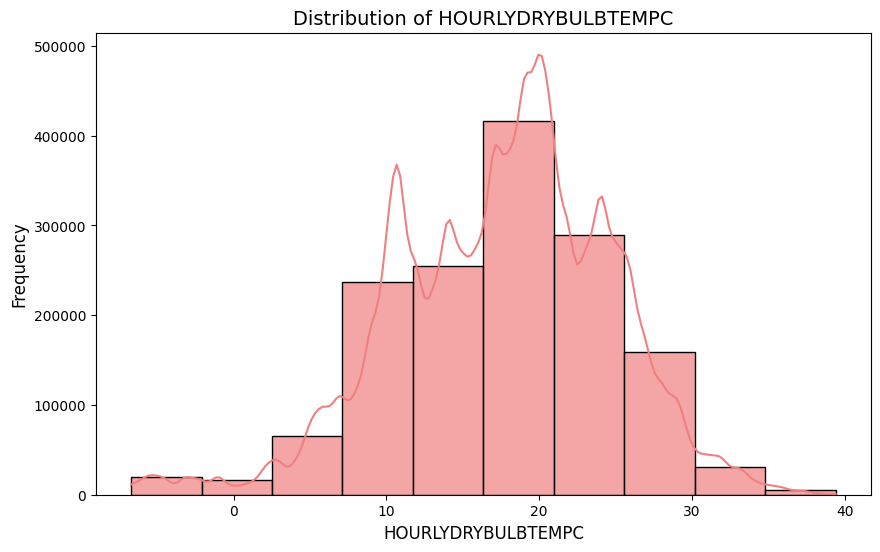

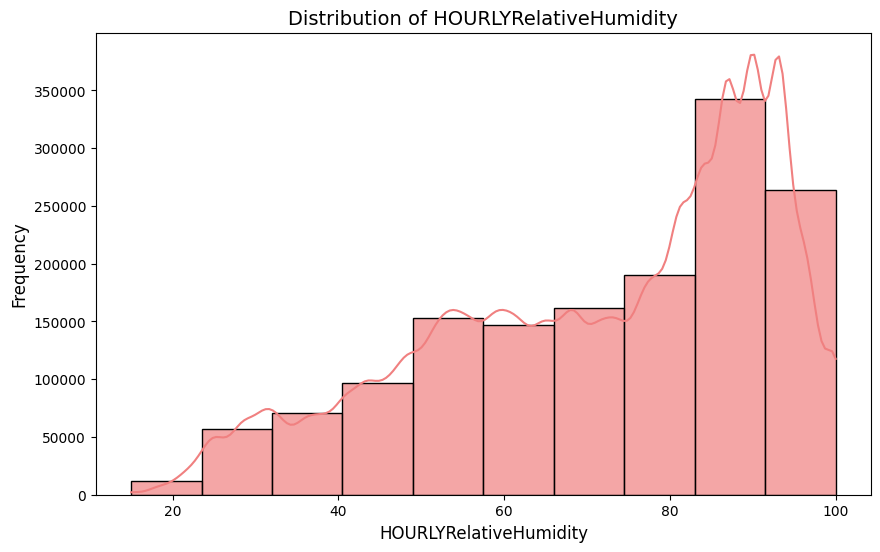

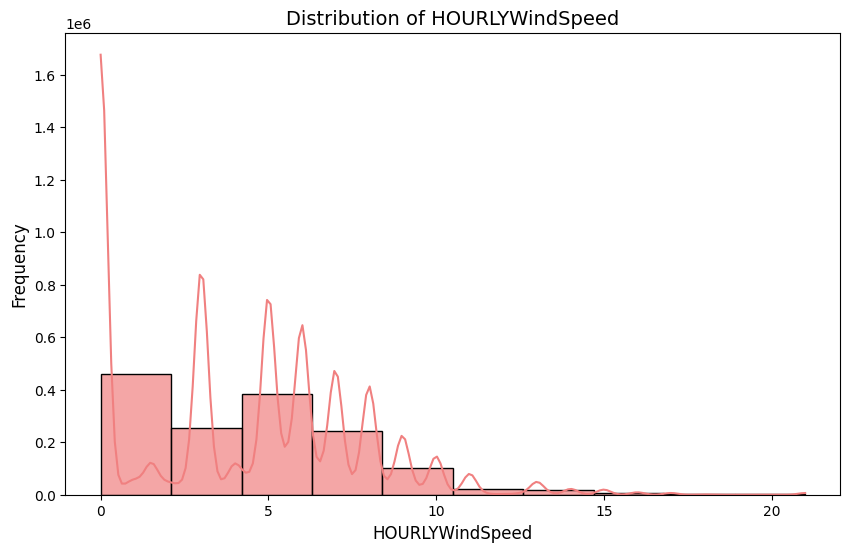

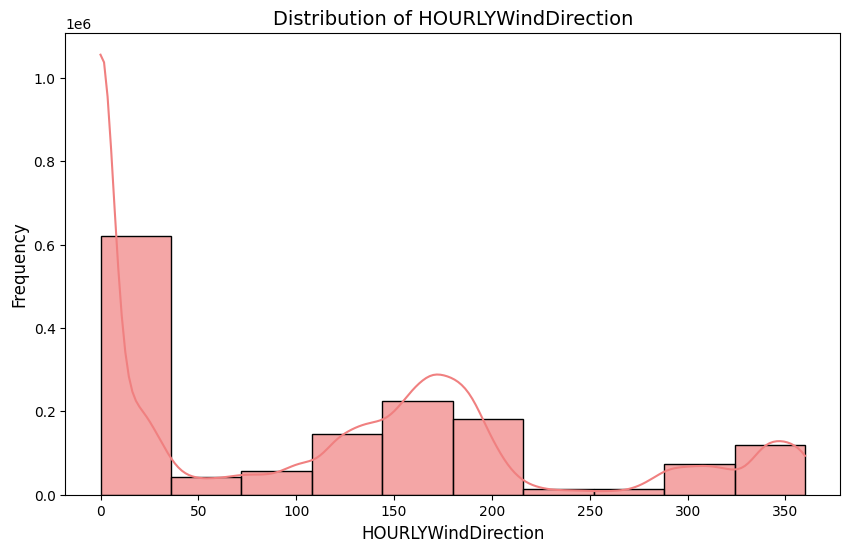

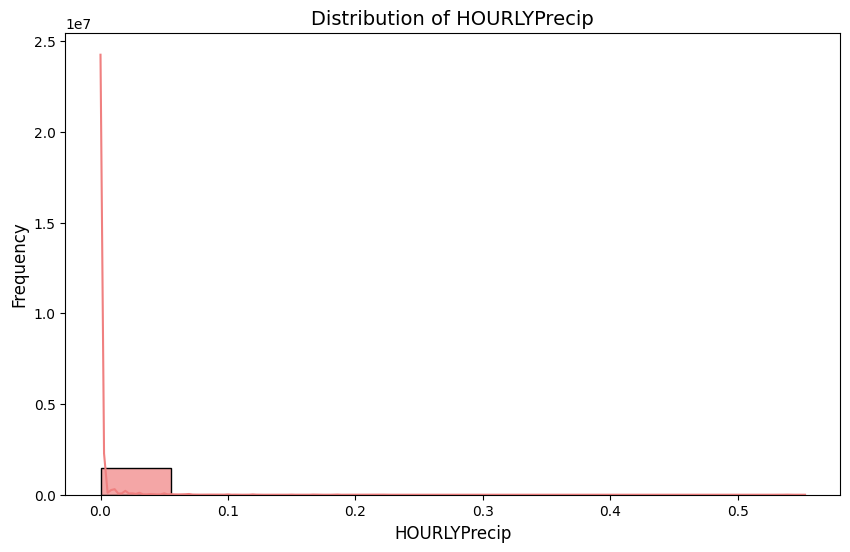

In [75]:
for col in range(len(fillna_col_list)):
    plot_histogram_kde(weather_rides_data, fillna_col_list[col], 
                        title=f"Distribution of {fillna_col_list[col]}", 
                        xlabel=f"{fillna_col_list[col]}",
                        bins=10, 
                        color="lightcoral")